<a href="https://colab.research.google.com/github/radwahashiesh/DeepLearningBreastCancer/blob/main/DL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# in this file 
fit the U_net model nd vgg-19 model 
and save two model to calculate accuracy in other colab file 
"loadModel"

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np 
import pandas as pd
import os
from tensorflow import keras
import cv2
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from tensorflow.keras.preprocessing.image import load_img ,img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D,BatchNormalization
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.layers import Flatten,Dropout,SpatialDropout2D,AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras import backend as K
# Common imports
import numpy as np
import os
import timeit
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path =  "/content/drive/MyDrive/Dataset_BUSI_with_GT (2)/"

In [ ]:
def num (image) :
    
    val = 0
    
    for i in range(len(image)) :
        if image[i] == '(' :
            while True :
                i += 1
                if image[i] == ')' :
                    break
                val = (val*10) + int(image[i])
            break
    
    return val

In [ ]:
X_b, y_b ,t_b= np.zeros((437, 128, 128, 1)), np.zeros((437, 128, 128, 1)),np.full(437,1)
X_n, y_n ,t_n= np.zeros((133, 128, 128, 1)), np.zeros((133, 128, 128, 1)),np.full(133,0)
X_m, y_m ,t_m= np.zeros((210, 128, 128, 1)), np.zeros((210, 128, 128, 1)),np.full(210,2)

In [ ]:
for i, tumor_type in enumerate(os.listdir(path)) :
    for image in os.listdir(path+tumor_type+'/') :
        p = os.path.join(path+tumor_type, image)
        img = cv2.imread(p,cv2.IMREAD_GRAYSCALE)           # read image as  grayscale
        
        if image[-5] == ')' :
            
            img = cv2.resize(img,(128,128))
            pil_img = Image.fromarray (img)
            
            if image[0] == 'b' :
                X_b[num(image)-1]+= img_to_array(pil_img)  # If image is real add it
            if image[0] == 'n' :                           # to X as benign , normal
                X_n[num(image)-1]+= img_to_array(pil_img)  # or malignant.
            if image[0] == 'm' :
                X_m[num(image)-1]+= img_to_array(pil_img)
        else :
            img = cv2.resize(img,(128,128))
            pil_img = Image.fromarray (img)
            
            if image[0] == 'b' :
                y_b[num(image)-1]+= img_to_array(pil_img)  # Similarly add the target
            if image[0] == 'n' :                           # mask to y.
                y_n[num(image)-1]+= img_to_array(pil_img)
            if image[0] == 'm' :
                y_m[num(image)-1]+= img_to_array(pil_img)

In [ ]:
X = np.concatenate((X_b, X_n, X_m), axis = 0)
y = np.concatenate((y_b, y_n, y_m), axis = 0)
t= np.concatenate((t_b, t_n, t_m), axis = 0)

In [ ]:
X /= 255.0
y /= 255.0

In [ ]:
print(X.shape)
print(y.shape)
print(t.shape)

(780, 128, 128, 1)
(780, 128, 128, 1)
(780,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(624, 128, 128, 1)
(624, 128, 128, 1)
(624, 128, 128, 1)
(624,)
(156, 128, 128, 1)
(156, 128, 128, 1)
(156, 128, 128, 1)
(156,)


In [ ]:
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import Concatenate
from keras.layers import MaxPooling2D
from keras.layers import Conv2DTranspose

from keras import Model

### Contracting path

In [ ]:
inply = Input((128, 128, 1,))

conv1 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(inply)
conv1 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(conv1)
pool1 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv1)
drop1 = Dropout(0.2)(pool1)

conv2 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(drop1)
conv2 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(conv2)
pool2 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv2)
drop2 = Dropout(0.2)(pool2)

conv3 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(drop2)
conv3 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(conv3)
pool3 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv3)
drop3 = Dropout(0.2)(pool3)

conv4 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(drop3)
conv4 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(conv4)
pool4 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv4)
drop4 = Dropout(0.2)(pool4)

### Bottleneck layer

In [ ]:
convm = Conv2D(2**10, (3,3), activation = 'relu', padding = 'same')(drop4)
convm = Conv2D(2**10, (3,3), activation = 'relu', padding = 'same')(convm)

### Expanding layer

In [ ]:
tran5 = Conv2DTranspose(2**9, (2,2), strides = 2, padding = 'valid', activation = 'relu')(convm)
conc5 = Concatenate()([tran5, conv4])
conv5 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(conc5)
conv5 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(conv5)
drop5 = Dropout(0.1)(conv5)

tran6 = Conv2DTranspose(2**8, (2,2), strides = 2, padding = 'valid', activation = 'relu')(drop5)
conc6 = Concatenate()([tran6, conv3])
conv6 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(conc6)
conv6 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(conv6)
drop6 = Dropout(0.1)(conv6)

tran7 = Conv2DTranspose(2**7, (2,2), strides = 2, padding = 'valid', activation = 'relu')(drop6)
conc7 = Concatenate()([tran7, conv2])
conv7 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(conc7)
conv7 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(conv7)
drop7 = Dropout(0.1)(conv7)

tran8 = Conv2DTranspose(2**6, (2,2), strides = 2, padding = 'valid', activation = 'relu')(drop7)
conc8 = Concatenate()([tran8, conv1])
conv8 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(conc8)
conv8 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(conv8)
drop8 = Dropout(0.1)(conv8)

In [ ]:
outly = Conv2D(2**0, (1,1), activation = 'relu', padding = 'same')(drop8)
model = Model(inputs = inply, outputs = outly, name = 'U-net')

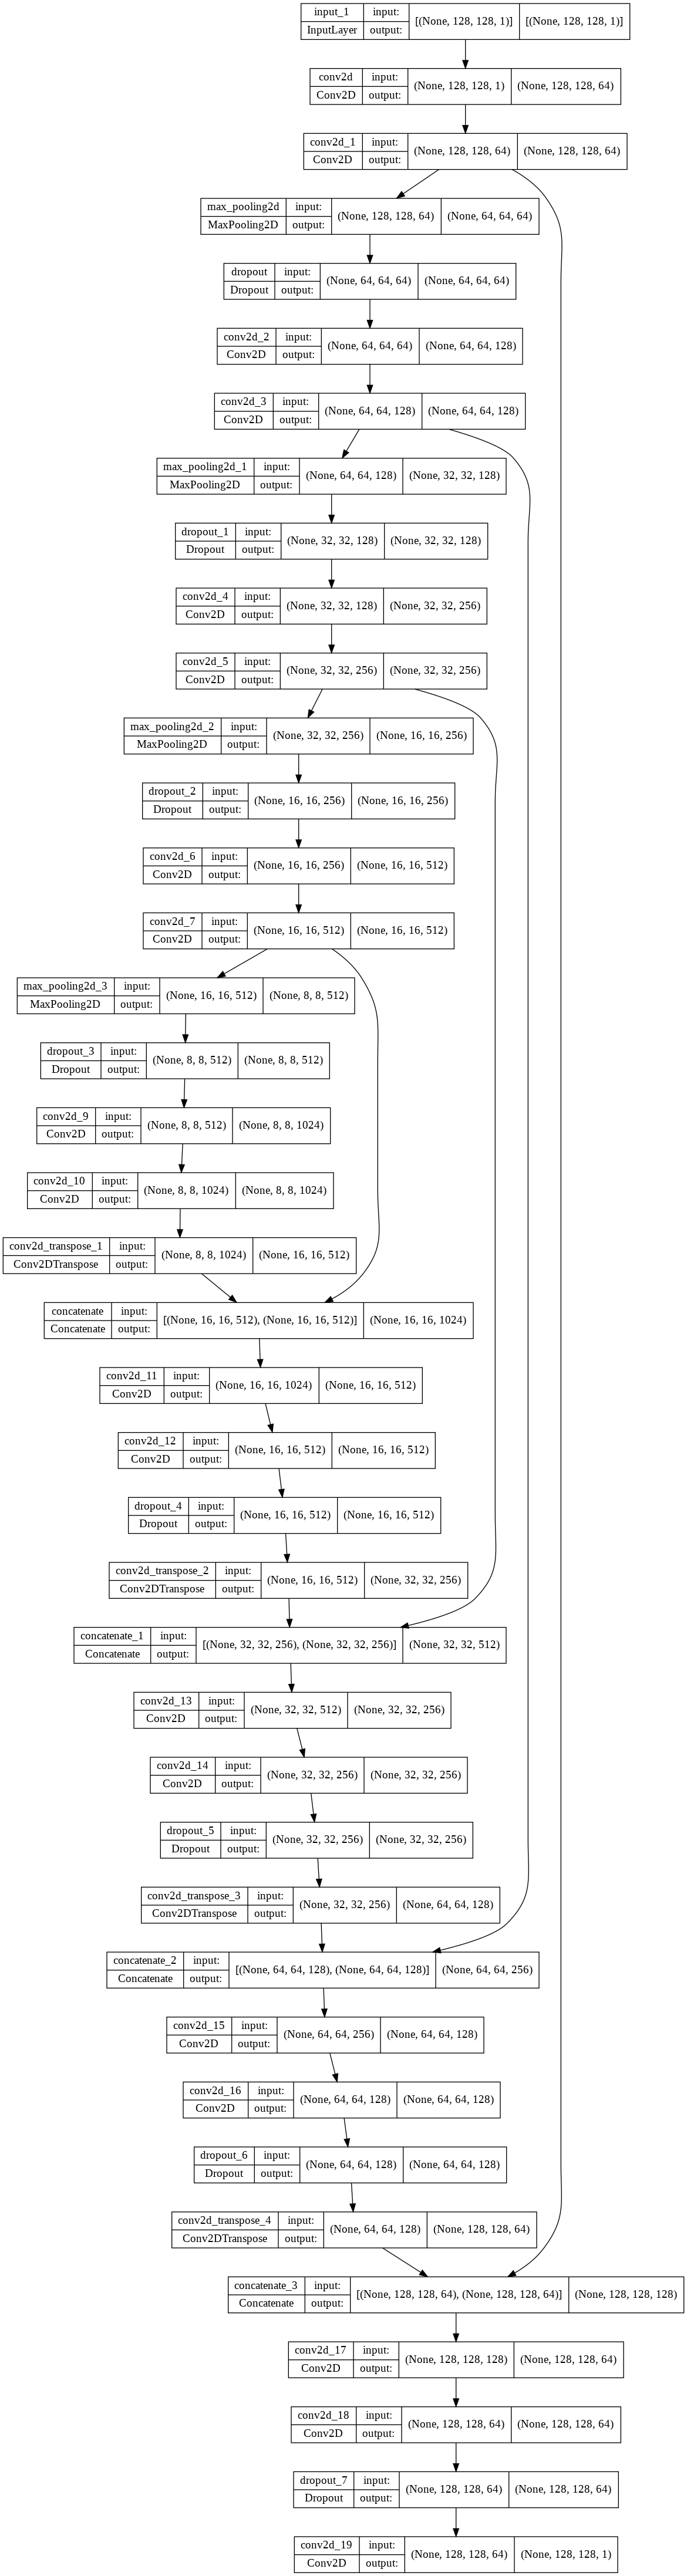

In [ ]:
keras.utils.plot_model(model, './model_plot.png', show_shapes = True)

In [ ]:
from keras.metrics import MeanIoU

# Training

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.Adam(learning_rate = 0.00005))
print(model.summary())

Model: "U-net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=10,restore_best_weights=True, verbose=1)

In [ ]:
start = timeit.default_timer()

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = (X_test, y_test), callbacks = [es])

Epoch 1/100
20/20 [==============================] - 38s 870ms/step - loss: 0.0740 - val_loss: 0.0778
Epoch 2/100
20/20 [==============================] - 8s 413ms/step - loss: 0.0721 - val_loss: 0.0755
Epoch 3/100
20/20 [==============================] - 8s 416ms/step - loss: 0.0693 - val_loss: 0.0719
Epoch 4/100
20/20 [==============================] - 8s 419ms/step - loss: 0.0650 - val_loss: 0.0718
Epoch 5/100
20/20 [==============================] - 8s 418ms/step - loss: 0.0587 - val_loss: 0.0734
Epoch 6/100
20/20 [==============================] - 8s 422ms/step - loss: 0.0537 - val_loss: 0.0688
Epoch 7/100
20/20 [==============================] - 9s 428ms/step - loss: 0.0511 - val_loss: 0.0620
Epoch 8/100
20/20 [==============================] - 9s 432ms/step - loss: 0.0499 - val_loss: 0.0598
Epoch 9/100
20/20 [==============================] - 9s 432ms/step - loss: 0.0492 - val_loss: 0.0662
Epoch 10/100
20/20 [==============================] - 9s 428ms/step - loss: 0.0475 - val_l

In [ ]:
end = timeit.default_timer()

In [ ]:
model.save("Unet_Model.h5")

In [ ]:
print('time to unet model in seconds is : \n{0}'.format(end-start))


time to unet model in seconds is : 
568.813440388


In [ ]:
actualmask=[]
for i  in y:
     b_np= np.array(i)
     g_np= np.array(i)
     r_np= np.array(i)
     final_img = np.dstack([b_np, g_np, r_np]).astype(np.uint8)
     actualmask.append(final_img)
actualmask=np.array(actualmask)

In [ ]:
def converter(img):
   b_np= np.array(i)
   g_np= np.array(i)
   r_np= np.array(i)
   final_img = np.dstack([b_np, g_np, r_np]).astype(np.uint8)
   return np.array(final_img)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(actualmask, t, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(624, 128, 128, 3)
(624,)
(156, 128, 128, 3)
(156,)


In [ ]:
start = timeit.default_timer()

In [ ]:
base_model = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(128,128,3),
    pooling=None
)

for l in base_model.layers:
    l.trainable = False

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
def VGG19():

    model = Sequential()
    model.add(base_model)
    
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3,activation='softmax'))
    
    model.compile(optimizer= keras.optimizers.Adam(learning_rate = 0.00005),loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])
    
    return model

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = VGG19()
model.summary()
es = EarlyStopping(monitor='val_loss', mode='min', patience=10,restore_best_weights=True, verbose=1)
history = model.fit(X_train1,y_train1,batch_size = 20,epochs=100,validation_data=(X_test1, y_test1),callbacks=[es])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 batch_normalization (BatchN  (None, 8192)             32768     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                      

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


32/32 [==============================] - 5s 93ms/step - loss: 1.1220 - acc: 0.5160 - val_loss: 0.7752 - val_acc: 0.8974
Epoch 2/100
32/32 [==============================] - 2s 60ms/step - loss: 0.6822 - acc: 0.7131 - val_loss: 0.6446 - val_acc: 0.9423
Epoch 3/100
32/32 [==============================] - 2s 60ms/step - loss: 0.4988 - acc: 0.7869 - val_loss: 0.5449 - val_acc: 0.9615
Epoch 4/100
32/32 [==============================] - 2s 69ms/step - loss: 0.4281 - acc: 0.8349 - val_loss: 0.4535 - val_acc: 0.9744
Epoch 5/100
32/32 [==============================] - 2s 60ms/step - loss: 0.3951 - acc: 0.8574 - val_loss: 0.3564 - val_acc: 0.9744
Epoch 6/100
32/32 [==============================] - 2s 61ms/step - loss: 0.3111 - acc: 0.8798 - val_loss: 0.2853 - val_acc: 0.9744
Epoch 7/100
32/32 [==============================] - 2s 61ms/step - loss: 0.3481 - acc: 0.8654 - val_loss: 0.2197 - val_acc: 0.9744
Epoch 8/100
32/32 [==============================] - 2s 61ms/step - loss: 0.2901 - acc: 

In [ ]:
end = timeit.default_timer()

In [ ]:
y_predictt=[]
print(y_pred_unet.shape)
for i in y_pred_unet:
  y_predictt.append(converter(i))
y_predictt=np.array(y_predictt)
print(y_predictt.shape)

(156, 128, 128, 1)
(156, 128, 128, 3)


In [ ]:

print('time to VGG19 model in seconds is : \n{0}'.format(end-start))


time to VGG19 model in seconds is : 
22.39101193400029


In [ ]:
model.save("VGG19_MASKED_Model_binary.h5")